In [16]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
orig_var = df.var(ddof=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print('Original feature variances:')
print(orig_var)
print('Explained variance ratio (3 components):')
print(pca.explained_variance_ratio_)
print('Cumulative variance ratio:')
print(np.cumsum(pca.explained_variance_ratio_))

Original feature variances:
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64
Explained variance ratio (3 components):
[0.72962445 0.22850762 0.03668922]
Cumulative variance ratio:
[0.72962445 0.95813207 0.99482129]


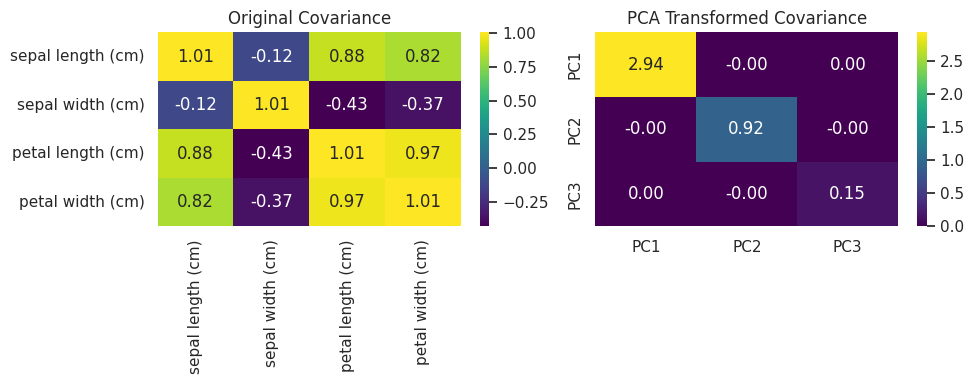

In [17]:
import matplotlib.pyplot as plt
orig_cov = pd.DataFrame(np.cov(X_scaled.T), index=feature_names, columns=feature_names)
pc_cov = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3']).cov()
fig, axs = plt.subplots(1,2, figsize=(10,4))
sb.heatmap(orig_cov, annot=True, fmt='.2f', cmap='viridis', ax=axs[0])
axs[0].set_title('Original Covariance')
sb.heatmap(pc_cov, annot=True, fmt='.2f', cmap='viridis', ax=axs[1])
axs[1].set_title('PCA Transformed Covariance')
plt.tight_layout()
plt.show()

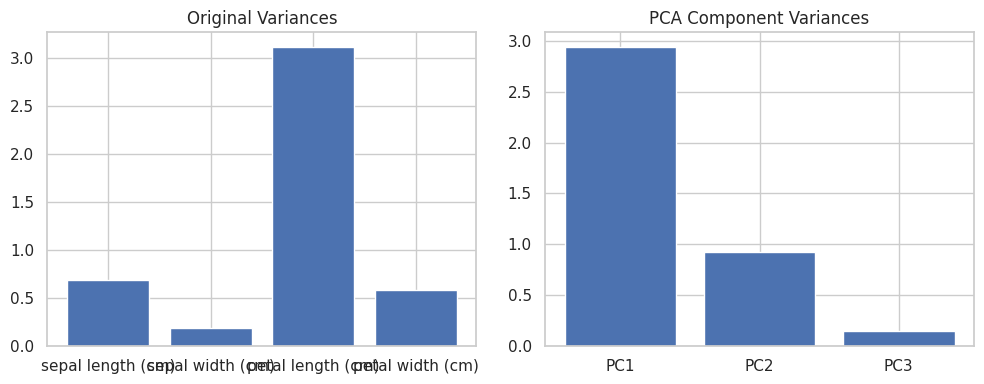

In [19]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[0].bar(feature_names, orig_var.values)
axs[0].set_title('Original Variances')
axs[1].bar(['PC1','PC2','PC3'], pca.explained_variance_)
axs[1].set_title('PCA Component Variances')
plt.tight_layout()
plt.show()